<a href="https://colab.research.google.com/github/rn0x7f/Machine-Learning/blob/main/An%C3%A1lisisDeDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pasos comunes para procesar datos
En esta libreta se encontrarán una serie de pasos a considerar para procesar nuestros datos correctamente, permitiendonos así un mejor análisis de ellos y con ello, un mejor modelo.  
No son pasos estrictamente a seguir uno por uno, son pasos generales a tomar en cuenta antes de empezar a entrenar nuestros modelos.  

# 1 - Importar datos
El primer paso siempre será conseguir nuestros datos, para posteriormente trabajr con ellos en forma de un **DataFrame** de **Pandas**, en este caso vamos a trabajar con un dataset que incluye información de casas en california, con los cuales vamos a buscar predecir el precio de las casas.

## 1.1 - Leer archivo csv
Primero vamos a leer nuestro archivo `.csv` que contiene todos los datos en formas de tablas dividas por comas. Para ello vamos a ocupar la función `pd.read_csv()` de pandas, creando así un dataframe con dichos datos que vamos a guardar en una variable:  


In [1]:
import pandas as pd
dataset = pd.read_csv('housing.csv')

# 2 - Primer vistazo
Una vez tenemos nuestro dataset en forma de dataframe dentro de nuestro programa ya podemos empezar a trabajar.  
Vamos a comenzar a revisar que todo esté en orden.  

## 2.1 - Revisar la estructura de los datos
Primero vamos a ver muy por encima unos cuantos ejemplos con el método `head()` para comenzar a darnos a la idea de qué es lo que tenemos, como el títulos de las columnas y los tipos de datos en ellas. Aquí podemos ver la variedad de datos que tenemos y a que hacen referencia, en particular vemos que en la columna **ocean_proximity** tenemos valores categóricos:  


In [2]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Podemos sacar mas información con `describe()` para ver más o menos con que rangos de valores vamos a estar trabajando, puede llegar a ser importante el tener muy en cuenta esta tabla:

In [3]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Además podemos usar `info()` para ver de forma más clara el tipo de dato que acepta cada columna y el número de datos que tiene cada columna, aquí en particular podemos comenzar a ver que en la columna de **total_rooms** tenemos menos datos que en todas las demás, por lo que más adelante habrá que completar esos datos con algún valor promedio o eliminar datos de las demás columnas.  

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Como ya nos hemos percatado de que tenemos una columna que tiene valores que no son numéricos, vamos a obtener una descripción de todos los valores posibles que podemos encontrar en esta columna con `value_counts()`, para posteriormente hacer una transformación usando estos valores:

In [5]:
dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# 3 - Observar visualmente los datos actuales
Si bien ya podemos hacernos una idea de la estructura de los datos, siempre es útil tener una ayuda visual que nos permita representar mejor la información para así sacar conclusiones más intuitivamente.

## 3.1 - Histogramas
Una forma rápida de obtener una vista gráfica de todos los datos en el dataframe es utilizar el método `hist()`.  
Aquí ya podemos empezar a ver patrones respecto a los valores que encontramos en cada una de las columnas, en particular podemos observar como algunas gráficas siguen un patrón descendente pero justo al final tenemos una subida desproporcional, lo que significa que datos que iban más allá del valor máximo de dicha columna fueron todos agrupados en ese máximo, por ejemplo, en la gráfica que menciona la edad de la casa, el valor máximo encontrado era $52$, pero ahi mismo en casas de $52$ años pueden haber casas de $58$, $70$ o incluso $100$ años.  

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

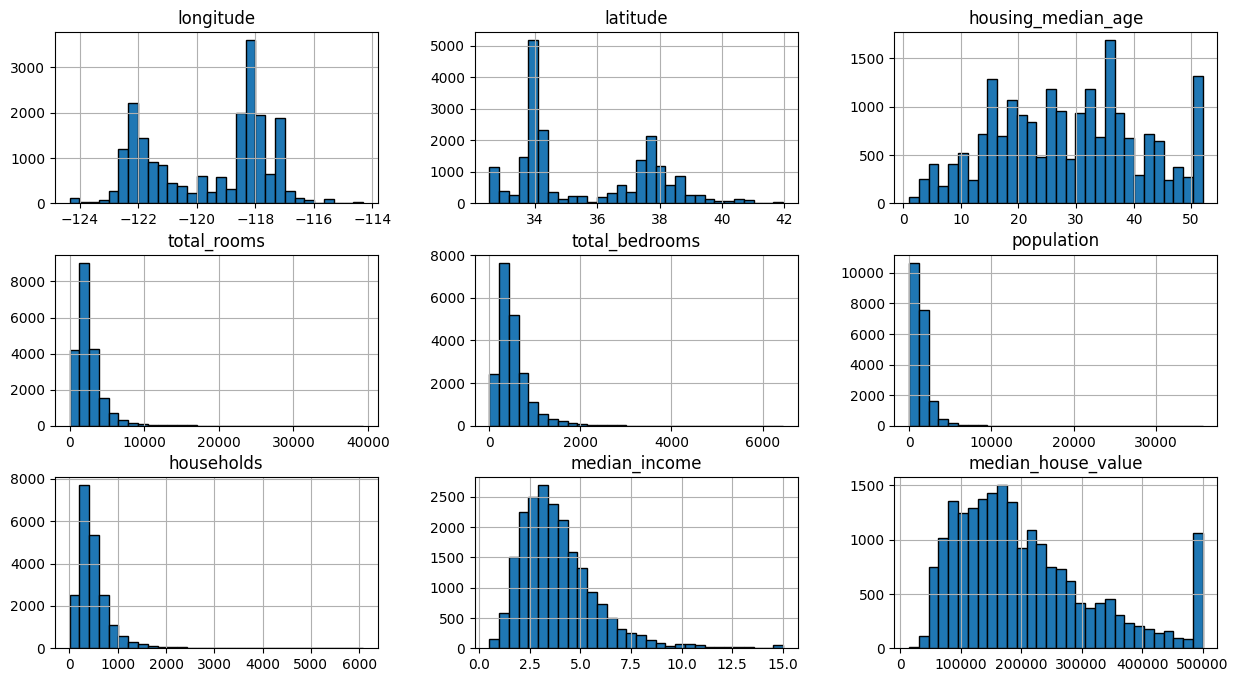

In [6]:
dataset.hist(figsize=(15,8), bins=30, edgecolor="black")

`figsize` _recibe una tupla con las dimensiones que queremos establecer para las gráficas._  
`bins` _es el número máximo de columnas que queremos mostrar en cada gráfica._  
`edgecolor` _es el color del borde entre cada columna de cada gráfica._



## 3.2 - Representación visual de las coordenadas
En ocasiones vamos a contr con datos que nos incluyan la latitud y longitud de donde fue tomado cada ejemplo, puede llegar a ser interesante hacer una gráfica con estas dos características para obtener por medio de puntos una representación visual de cómo están distribuidos los datos geográficamente, pudiendo también alterar la apariencia de cada punto en el mapa para filtrar o cambiár la visualización de los puntos de acuerdo a un otro valor en el dataframe como podría ser el precio de las casas.  
Esto se hará con la función `scatterplot()` de la biblioteca **Seaborn**.  

### 3.2.1 - Gráfico de las coordenadas
No hace falta más que mandar a llamar la función `scatterplot()` especificando cuales serán nuestros ejes $X$ y $Y$ mientras pasamos como argumento el dataframe completo, aquí podemos ver claramente el mapa de california, lugar de donde fueron tomados nuestros datos:  

<Axes: xlabel='longitude', ylabel='latitude'>

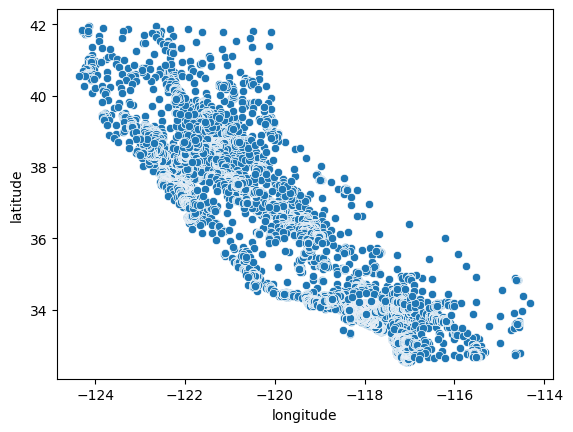

In [7]:
import seaborn as sns
sns.scatterplot(x="longitude", y="latitude", data=dataset)

### 3.2.2 - Cambio de color respecto a otro valor
Ahora digamos que queremos ver visualmente dentro del mapa el cómo se distribuyen las casas más costosas de las más baratas, simplemente debemos agregar el parámetro **hue** y pasarle el nombre de cualquier otra columna dentro de nuestro dataframe para ver un degradado del color de acuerdo a cómo va aumentando el precio, en este ejemplo podemos también sacar mas información, al ver cómo las casas del lado izquierdo, osea, las que estan más cerca del mar, son las que tienden a tener un costo más elevado.  

<Axes: xlabel='longitude', ylabel='latitude'>

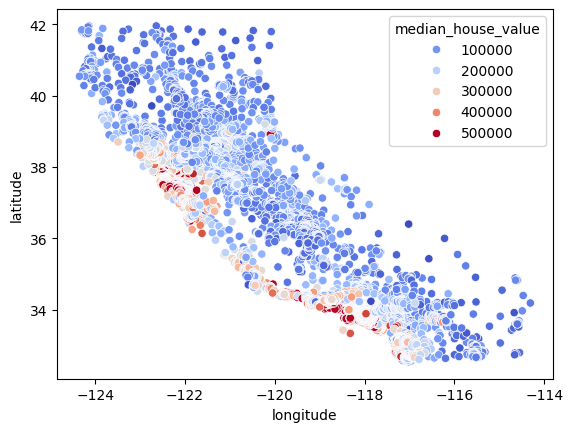

In [8]:
sns.scatterplot(x="longitude", y="latitude", data=dataset, hue="median_house_value", palette="coolwarm")

`palette` _es para especificar la paleta de colores que queremos utilizar._

### 3.2.3 - Cambio de tamaño respecto a otro valor
Ahora podría ser interesante ver como influye cualquier otra variable del dataframe en el mismo mapa, esta vez variando el tamaño. Para esto tenemos dos formas de hacerlo.  
1. Parámetro **s**: Recibe la columna completa del dataframe que queremos usar para variar el tamaño de los puntos, debe escalarse dividiendo los atributos de las celdas de la tabla. Este método puede no funcionar en algunas versiones.  
2. Parámetros **size** y **sizes**: **size** recibe la columna del dataframe a utilizar y **sizes** recibe una tupla con el tamaño más pequeño y más grande que queremos para cada círculo.  

<Axes: xlabel='longitude', ylabel='latitude'>

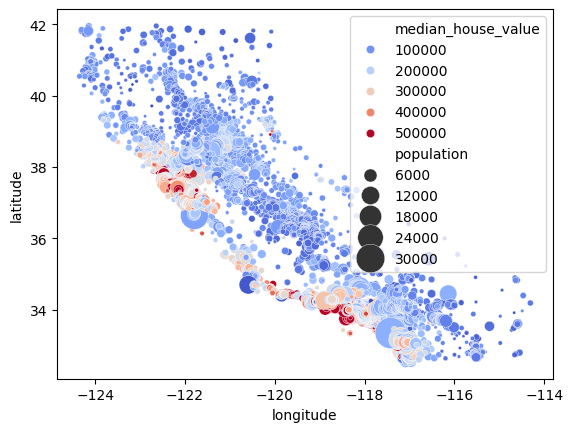

In [9]:
#sns.scatterplot(x="longitude",y="latitude",data=dataset,hue="median_house_value",
#               palette="coolwarm", s=dataset["population"]/100)
sns.scatterplot(x="longitude",y="latitude",data=dataset,hue="median_house_value",
                palette="coolwarm", size=dataset["population"], sizes=(5,500))

### 3.2.4 Filtrar datos del mapa
Ahora también puede ser posible que queramos ver la ubicación en el mapa de ciertos datos en específico, como por ejemplo, donde se encuentran las casas de la gente con ingresos más altos.  
Para no hace falta nada más que hacer el filtro en el parámetro de **data** tal y como nos lo permite el propio pandas, dentro del "índice".  
En este caso, ya sabemos que el valor más alto en la tabla de ingresos es el 15, asi que simplemente filtramos de esta manera: `dataset[dataset.median_income > 14]`:  

In [10]:
dataset[dataset.median_income > 14].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
4604,-118.33,34.06,52.0,1841.0,240.0,693.0,218.0,15.0001,500001.0,<1H OCEAN
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

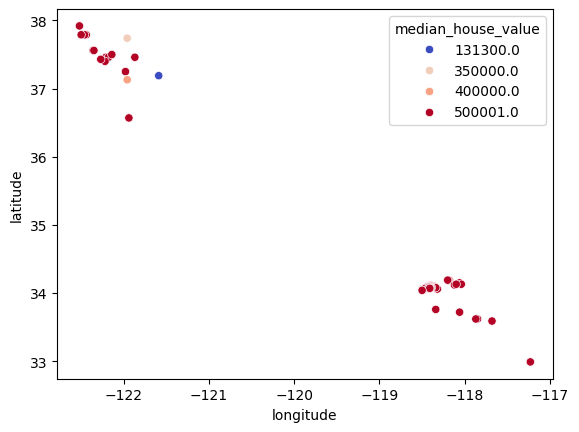

In [11]:
sns.scatterplot(x="longitude",y="latitude",data=dataset[dataset.median_income > 14],hue="median_house_value",
                palette="coolwarm")

# 4 - Arreglar inconsistencias en los datos
Ahora hace falta trabajar las inconsistencias que observamos en el primer paso, con el fin de el modelo evite confusiones en la interpretación de las relaciones entre las features y la label.  

## 4.1 - Eliminar filas con datos vacíos
Como recordaremos, en nuestra columna **total_rooms** encontrabamos menos datos que en el resto de las columnas, esto significa que hay ejemplos dentro de nuestro data set que tienen dicho valor faltante, lo que convierte a estos ejemplos en filas con valores nulos, esto puede llegar a afectar a nuestro modelo, por lo que una de las soluciones es simplemente borrar todas las filas que lleguen a tener algún valor nulo, esto podemos simplemente hacerlo con el método de los dataframes `dropna()`, que nos regresa una copia de nuestro dataset pero sin los ejemplos con valores nulos, igualando así la cantidad de valores en totas las columnas del dataset.   

In [12]:
dataset_na = dataset.dropna()
dataset_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## 4.2 Convertir características categóricas a numéricas
Recordando que la columna **ocean_proximity** no contaba con valores numéricos, si no más bien, valores que nos categorizaban cuán cerca esta la casa del mar por medio de una string:  

In [13]:
dataset_na["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

debemos recordar que necesitamos tratar con números, pero no podemos simplemente convertir cada uno de los posibles valores de la columna en algo como números del 0 al 4, pues al tratar con valores numéricos puede que se le dé un trato desnivelado a esta columna a la hora de asignar los pesos del modelo por algo como que el 4 es un número mayor al 2, para solucionar esto se hace algo llamado **One-Hot Encoding**, que nos regresa **Dummies**, que no es más que crearnos una columna nueva para cada categoría, donde simplemente asignaremos un $1$ a la columna que corresponde al valor del ejemplo actual y un $0$ al resto de las columnas de las demás categorías.  
Esto podemos hacerlo automáticamente con la función de pandas `get_dummies()` que recibe como argumento la columna del dataframe que tiene algún valor categórico, nos termina regresando un nuevo dataframe con cada una de las nuevas columnas con $0$'s y $1$'s:


In [14]:
dummies = pd.get_dummies(dataset_na["ocean_proximity"], dtype=int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


`dtype` _en ocasiones puede que el data frame se llene con valores booleanos True y False, con esto cambiamos dichos valores a ceros y unos._

Posteriormente debemos agregar este dataframe a nuestro dataset con el método `join()`:  

In [15]:
dataset_na = dataset_na.join(dummies)

Para finalmente eliminar la antigua columna **ocean_proximity**:  

In [16]:
dataset_na = dataset_na.drop(["ocean_proximity"], axis=1)
dataset_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


`axis=1` _es únicamente para especificar que queremos eliminar columnas._

# 5 - Análisis de correlaciones
Algo muy útil es ver las correlaciones de nuestros datos, esto nos permite ver como cambia cada uno de los valores a medida que los demás valores van cambiando, en particular, nos permitirá ver qué características son las que influyen más en el valor de nuestra etiqueta.  

## 5.1 - Obtener tabla de correlaciones
Para obtener las correlaciones de nuestro dataset simplemente hace falta usar el método `corr()` del dataframe, sin embargo es algo confuso observar la información aquí mismo y llega a ser confuso.  

In [17]:
dataset_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


## 5.2 - Graficar las correlaciones de forma vistosa
Si queremos analizar los datos correctamente, como siempre, vamos a obtener una gráfica de la tabla anterior donde sea más fácil distinguir como se relacionan las características entre sí, para esto simplemente necesitamos pasar el dataframe de las correlaciones a la funcion `heatmap()` de **Seaborn**:  

<Axes: >

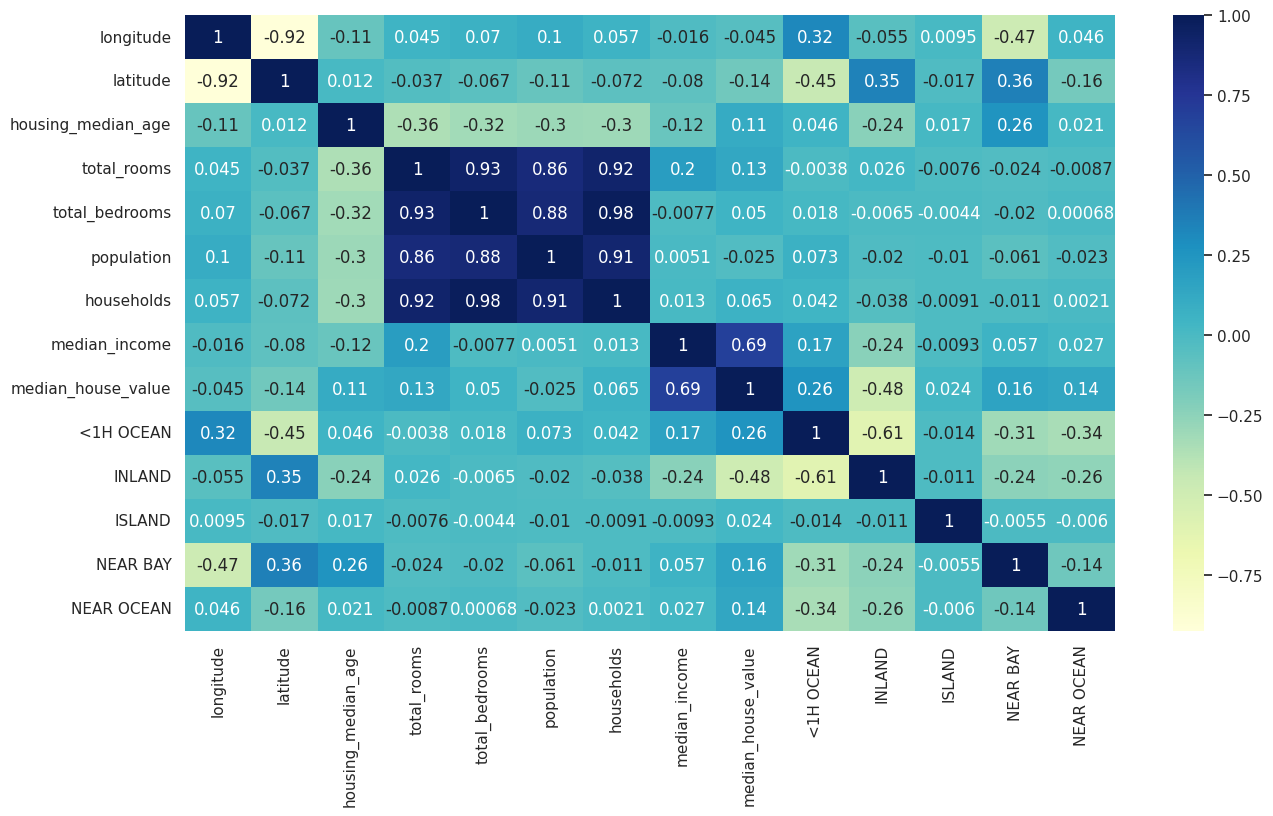

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(dataset_na.corr(),annot=True, cmap="YlGnBu")

`sns.set(rc={'figure.figsize':(15,8)})` _únicamente escala el gráfico con las dimensiones seleccionadas._  
`annot=True` _establecemos que queremos ver los valores numéricos de las relaciones._  
`cmap` _nos permite cambiar la paleta de colores del gráfico._  

## 5.3 - Interpretar las correlaciones
Este tipo de gráfico se lee de la siguiente manera, tenemos todas las características tanto en el eje $x$ como en el $y$, de tal forma que para cada característica vamos a observar un valor numérico de $-1$ a $1$ respecto a cada una de las otras características. Esto nos dice como se relacionan las características en dicha intersección de la siguiente manera:  
* $-1$: Relación inversa, si un valor aumenta el otro disminuye completamente y visceversa.  
* $0$: No hay relación alguna.  
* $1$: Relación perfecta, si un valor aumenta el otro valor aumenta de la misma forma y visceversa. Se ve siempre que comparamos una característica consigo misma, es por eso que tenemos esa diagonal con puros unos.  

Aquí ya podemos sacar mucha información con sentido, pues por ejemplo, vemos como la intersección **meadian_house_value** y **median_income** tiene un valor muy elevado establecido en 0.69, cosa que es lógica, pues entre más ingresos tenga la persona, más costosa será su casa.  


## 5.4 - Obtener las correlaciones de nuestra etiqueta
Como mencionamos anteriormente, algo muy útil de las correlaciones es que podemos ver que tanto afecta cada una de las características a nuestra etiqueta, podemos obtener esto accediendo al indice de nuestra etiqueta en el dataframe que obtenemos con el método `corr()`:  

In [19]:
dataset_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

Ahora tenemos todo listo para comenzar a entrenar nuestro modelo.